In [88]:
import sys
from pathlib import Path
import ProbabilisticParcellation.functional_profiles as fp
import ProbabilisticParcellation.hierarchical_clustering as cl
import ProbabilisticParcellation.similarity_colormap as cm
import Functional_Fusion.dataset as ds
import matplotlib.pyplot as plt
import ProbabilisticParcellation.functional_profiles as fp
import pandas as pd
import seaborn as sb
import ProbabilisticParcellation.scripts.atlas_paper.feature_model as fm
from ProbabilisticParcellation.scripts.atlas_paper.ridge_reg import ridgeFit
import numpy as np
import os
import ProbabilisticParcellation.util as ut
from copy import deepcopy


ut.figure_dir = "/Users/jdiedrichsen/Dropbox (Diedrichsenlab)/papers/AtlasPaper/figure_parts/"
if not os.path.exists(ut.figure_dir):
    ut.figure_dir = "/Users/callithrix/Dropbox/AtlasPaper/figure_parts/"


## Explore functional profiles in M1-M4 regions 

In [89]:
Data, regions = fm.load_profiles()
tags = fm.load_features()
tags_individ = fm.subject_features(tags, Data)
task_matrix, task_codes = fm.task_indicator(Data)
tags_task = np.concatenate(
    (tags_individ.T.to_numpy(), task_matrix), axis=1)

Data_norm, tags_norm = fm.normalize(Data[regions], tags_task)

# Ridge regression
R2, features = ridgeFit(Data_norm.to_numpy(), tags_norm,
                        fit_intercept=False, voxel_wise=False, alpha=1.0)


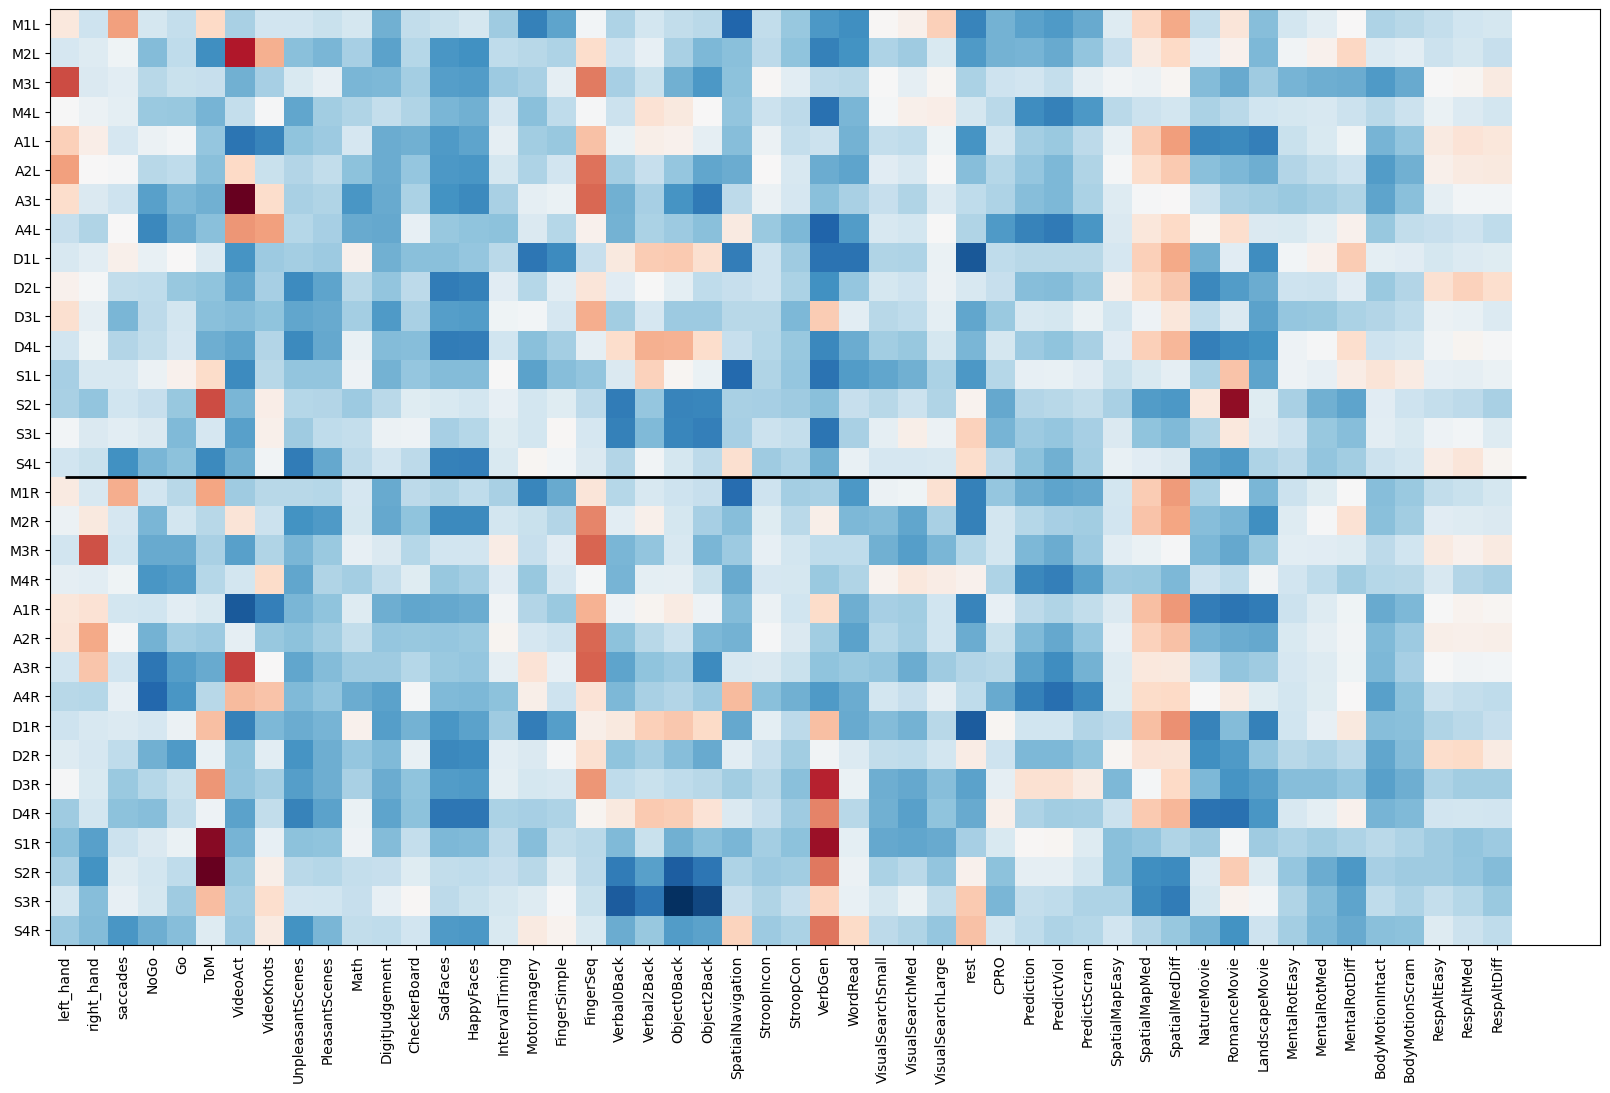

In [90]:
# Make dataframe
Features = pd.DataFrame(features.T, columns=[
    'left_hand', 'right_hand', 'saccades'] + list(task_codes.keys()), index=regions)

# Plot
cmap = plt.get_cmap('RdBu_r')
plt.figure(figsize=(20, 20))
plt.imshow(Features, cmap=cmap)
plt.yticks(np.arange(len(regions)), regions)
plt.xticks(np.arange(len(Features.columns.tolist())),
           Features.columns.tolist(), rotation=90)

# Plot a horizontal line in the middle
plt.hlines(len(regions) / 2 - 0.5, 0,
           len(Features.columns.tolist()), color='black', linewidth=2)


# Compare with action regions

In [91]:
motor_regions = ['M1L','M1R','M2L','M2R','M3L','M3R','M4L','M4R']
# reg_colors = [[0.681,0.2444,0.2878],[1.0,0.4204,0.7005],[0.5,0.3261,1.0],[0.8166,0.1178,0.5079]]
action_regions = ['A1L','A1R','A2L','A2R','A3L','A3R','A4L','A4R']

In [92]:
def normalize(data, axis=0):
    """Normalize data by subtracting the mean of each column and dividing by the standard deviation.
    """
    data = deepcopy(data)
    data -= data.mean(axis=axis)
    data /= data.std(axis=axis)

    return data

([<matplotlib.axis.XTick at 0x7fd5aa6edd30>,
 [Text(0, 0, 'left_hand'),
  Text(1, 0, 'right_hand'),
  Text(2, 0, 'saccades'),
  Text(3, 0, 'NoGo'),
  Text(4, 0, 'Go'),
  Text(5, 0, 'ToM'),
  Text(6, 0, 'VideoAct'),
  Text(7, 0, 'VideoKnots'),
  Text(8, 0, 'UnpleasantScenes'),
  Text(9, 0, 'PleasantScenes'),
  Text(10, 0, 'Math'),
  Text(11, 0, 'DigitJudgement'),
  Text(12, 0, 'CheckerBoard'),
  Text(13, 0, 'SadFaces'),
  Text(14, 0, 'HappyFaces'),
  Text(15, 0, 'IntervalTiming'),
  Text(16, 0, 'MotorImagery'),
  Text(17, 0, 'FingerSimple'),
  Text(18, 0, 'FingerSeq'),
  Text(19, 0, 'Verbal0Back'),
  Text(20, 0, 'Verbal2Back'),
  Text(21, 0, 'Object0Back'),
  Text(22, 0, 'Object2Back'),
  Text(23, 0, 'SpatialNavigation'),
  Text(24, 0, 'StroopIncon'),
  Text(25, 0, 'StroopCon'),
  Text(26, 0, 'VerbGen'),
  Text(27, 0, 'WordRead'),
  Text(28, 0, 'VisualSearchSmall'),
  Text(29, 0, 'VisualSearchMed'),
  Text(30, 0, 'VisualSearchLarge'),
  Text(31, 0, 'rest'),
  Text(32, 0, 'CPRO'),
  Text

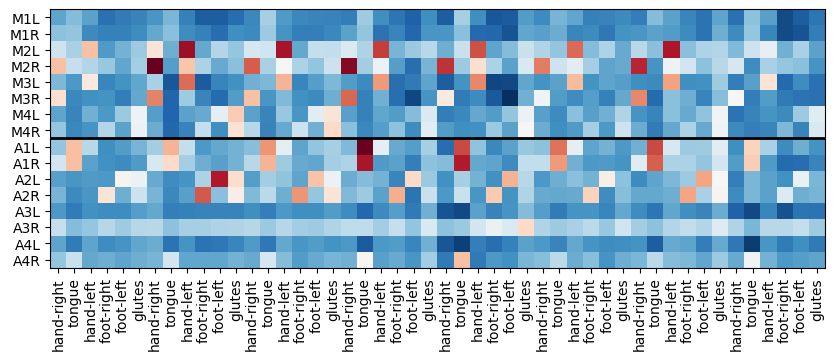

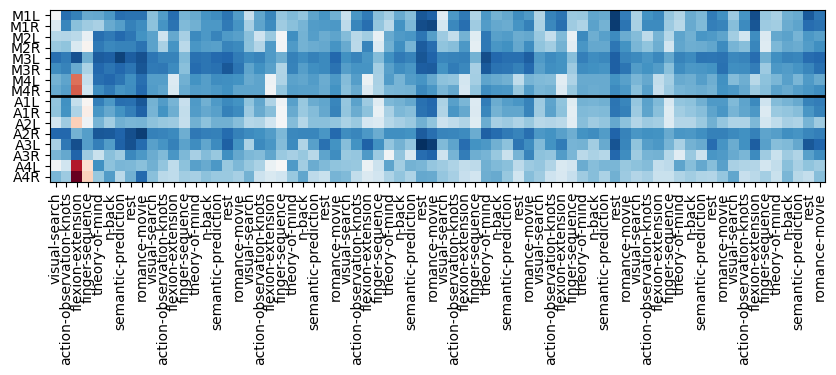

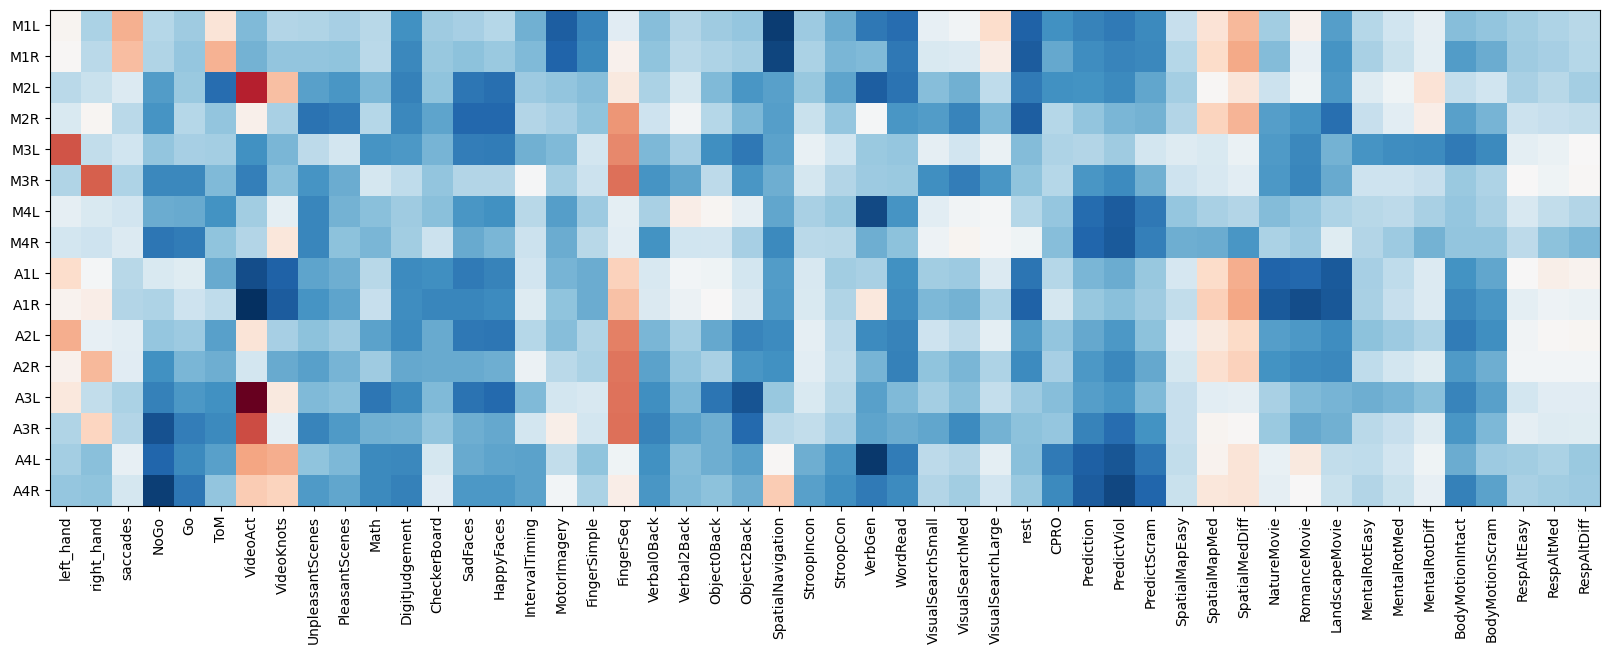

In [93]:
Data_all = pd.read_csv(ut.export_dir + '/Profiles/' +
                'NettekovenSym32_profile_individ.tsv', delimiter='\t')
Somatotopic = Data_all[Data_all.dataset == 'Somatotopic']
# Zstandardize columns
# Somatotopic[regions] = normalize(Somatotopic[regions])

Pontine = Data_all[Data_all.dataset == 'Pontine']
# Pontine[regions] = normalize(Pontine[regions])

IBC = Data_all[Data_all.dataset == 'IBC']
# IBC[regions] = normalize(IBC[regions])

Nishimoto = Data_all[Data_all.dataset == 'Nishimoto']
# Nishimoto[regions] = normalize(Nishimoto[regions])

select_regions = motor_regions + action_regions
plt.figure(figsize=(10, 10))
plt.imshow(Somatotopic[select_regions].T, cmap=cmap)
plt.yticks(np.arange(len(select_regions)), select_regions)
plt.xticks(np.arange(len(Somatotopic.condition.tolist())),
           Somatotopic.condition.tolist(), rotation=90)
plt.hlines(len(select_regions) / 2 - 0.5, -0.5,
           len(Somatotopic.index.tolist()) - 0.5, color='black', linewidth=2)

plt.figure(figsize=(10, 10))
plt.imshow(Pontine[select_regions].T, cmap=cmap)
plt.yticks(np.arange(len(select_regions)), select_regions)
plt.xticks(np.arange(len(Pontine.condition.tolist())),
           Pontine.condition.tolist(), rotation=90)
plt.hlines(len(select_regions) / 2 - 0.5, -0.5,
           len(Pontine.index.tolist())-0.5, color='black', linewidth=2)

plt.figure(figsize=(20, 20))
plt.imshow(Features.loc[select_regions], cmap=cmap)
plt.yticks(np.arange(len(select_regions)), select_regions)
plt.xticks(np.arange(len(Features.loc[select_regions].columns.tolist())),
           Features.loc[select_regions].columns.tolist(), rotation=90)


([<matplotlib.axis.XTick at 0x7fd5cc3f03d0>,
 [Text(0, 0, 'left_hand'),
  Text(1, 0, 'right_hand'),
  Text(2, 0, 'saccades'),
  Text(3, 0, 'NoGo'),
  Text(4, 0, 'Go'),
  Text(5, 0, 'ToM'),
  Text(6, 0, 'VideoAct'),
  Text(7, 0, 'VideoKnots'),
  Text(8, 0, 'UnpleasantScenes'),
  Text(9, 0, 'PleasantScenes'),
  Text(10, 0, 'Math'),
  Text(11, 0, 'DigitJudgement'),
  Text(12, 0, 'CheckerBoard'),
  Text(13, 0, 'SadFaces'),
  Text(14, 0, 'HappyFaces'),
  Text(15, 0, 'IntervalTiming'),
  Text(16, 0, 'MotorImagery'),
  Text(17, 0, 'FingerSimple'),
  Text(18, 0, 'FingerSeq'),
  Text(19, 0, 'Verbal0Back'),
  Text(20, 0, 'Verbal2Back'),
  Text(21, 0, 'Object0Back'),
  Text(22, 0, 'Object2Back'),
  Text(23, 0, 'SpatialNavigation'),
  Text(24, 0, 'StroopIncon'),
  Text(25, 0, 'StroopCon'),
  Text(26, 0, 'VerbGen'),
  Text(27, 0, 'WordRead'),
  Text(28, 0, 'VisualSearchSmall'),
  Text(29, 0, 'VisualSearchMed'),
  Text(30, 0, 'VisualSearchLarge'),
  Text(31, 0, 'rest'),
  Text(32, 0, 'CPRO'),
  Text

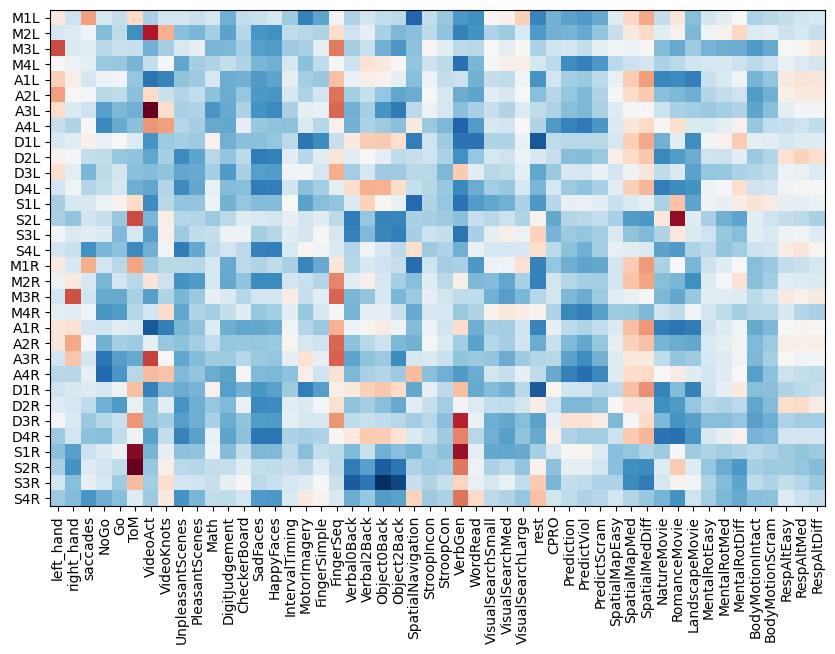

In [94]:
# Only select rows where the region is in the list
Feature_regions = Features.loc[regions]
cmap = plt.get_cmap('RdBu_r')
plt.figure(figsize=(10, 10))
plt.imshow(Features.loc[regions], cmap=cmap)
plt.yticks(np.arange(len(regions)), regions)
plt.xticks(np.arange(len(Features.columns.tolist())),
           Features.columns.tolist(), rotation=90)



In [95]:
Nishimoto_avg

participant_num       M1L       M2L       M3L       M4L  \
condition                                                                  
AnimalPhoto                  0.0 -1.229493  1.468640  0.203174  0.778516   
AnimalVoice                  0.0  1.455276 -1.560704 -0.567500 -1.149282   
CalcEasy                     0.0 -0.599375  0.185591  1.156323  1.137350   
CalcHard                     0.0 -0.551788  0.831126  0.130879  0.802530   
CategoryFluency              0.0  0.578250  1.604239 -0.499291 -0.209658   
...                          ...       ...       ...       ...       ...   
TimeValue                    0.0  0.353008  0.580746 -0.603724  1.002509   
TrafficSign                  0.0 -1.926790 -1.116233 -0.078339  0.480155   
WordMeaning                  0.0  2.156433  0.012595 -0.114375  0.310769   
WorldName                    0.0 -1.020863  0.856800 -0.860954  0.349596   
WorldPlace                   0.0  0.015330  0.761022  1.670542  1.633850   

                      A1L       A2L       A3L       A4L       D1L  ...  \
condition                                                          ...   
AnimalPhoto      0.792396  0.573446  1.423225 -0.814440 -0.040268  ...   
AnimalVoice     -0.273970 -0.905759  0.438198  0.392950  0.727821  ...   
CalcEasy        -0.156774  0.621937 -1.297498  1.463655 -0.175940  ...   
CalcHard         0.500078  1.854534 -0.514159  1.261968  1.670403  ...   
CategoryFluency  0.219529  0.171373 -0.990411 -0.362928  0.018214  ...   
...                   ...       ...       ...       ...       ...  ...   
TimeValue       -0.460522  0.099066  0.220631  1.416423  0.185697  ...   
TrafficSign     -1.015365  0.857900 -1.385699 -0.012617 -0.955249  ...   
WordMeaning      0.744578 -0.543417  3.087490  1.001516  1.598238  ...   
WorldName       -0.930941 -0.045167 -1.831893  1.130376  0.138106  ...   
WorldPlace       0.068952  0.091920  1.160606  1.149327 -0.503269  ...   

                      A3R       A4R       D1R       D2R       D3R       D4R  \
condition                                                                     
AnimalPhoto      2.353648 -1.254248 -0.153529 -0.462952  0.175900 -1.257208   
AnimalVoice      1.260442  0.281867  0.885815  1.060031  1.577238  0.910029   
CalcEasy        -1.370244  0.562829 -0.162837 -1.802318 -0.110699 -1.447183   
CalcHard         0.289017  0.991081  1.718374 -0.943660  0.104632 -0.188774   
CategoryFluency -0.947134 -0.486068  0.039582  0.150589  0.072809 -0.314574   
...                   ...       ...       ...       ...       ...       ...   
TimeValue        0.158202 -0.054165  0.110292  0.173763 -0.066658  0.067749   
TrafficSign     -2.178814 -0.040306 -0.944791 -2.050648 -1.128471 -1.667210   
WordMeaning      2.004210  0.936528  1.414536  0.270152 -0.364079  1.331059   
WorldName       -1.215217  1.760911  0.123163 -0.720738  1.358321  0.824336   
WorldPlace       2.377418 -0.684772 -0.540796  0.401306  0.683398 -0.396479   

                      S1R       S2R       S3R       S4R  
condition                                                
AnimalPhoto     -0.998266 -1.268136  0.969673  0.460709  
AnimalVoice      0.525032  1.362679  1.473317  3.269269  
CalcEasy         0.045009  1.043587 -0.562387 -0.987036  
CalcHard         0.193863  2.465903 -0.222720  1.049579  
CategoryFluency  0.380302  0.744149 -0.172852  0.905962  
...                   ...       ...       ...       ...  
TimeValue        0.700403  0.660595  0.253552  0.182668  
TrafficSign     -0.505357  0.007677 -0.732340 -0.747689  
WordMeaning      0.471351  1.539974 -0.986374 -0.286914  
WorldName       -1.423811  0.910957  0.211985 -0.404669  
WorldPlace       1.415488 -0.394537  1.621954  1.612615  

[104 rows x 33 columns]

/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_495/1428232048.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  IBC_avg = IBC.groupby('condition').mean()
/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_495/1428232048.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Nishimoto_avg = Nishimoto.groupby('condition').mean()


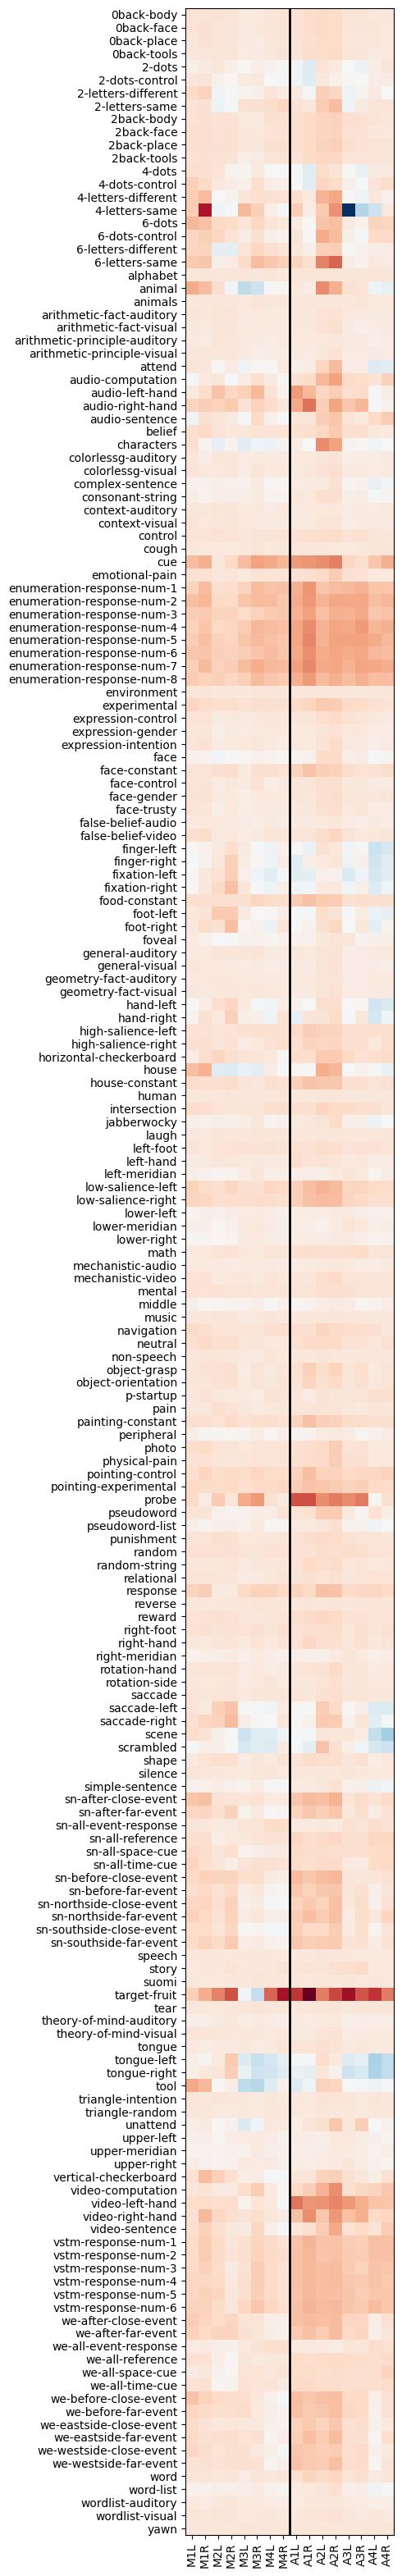

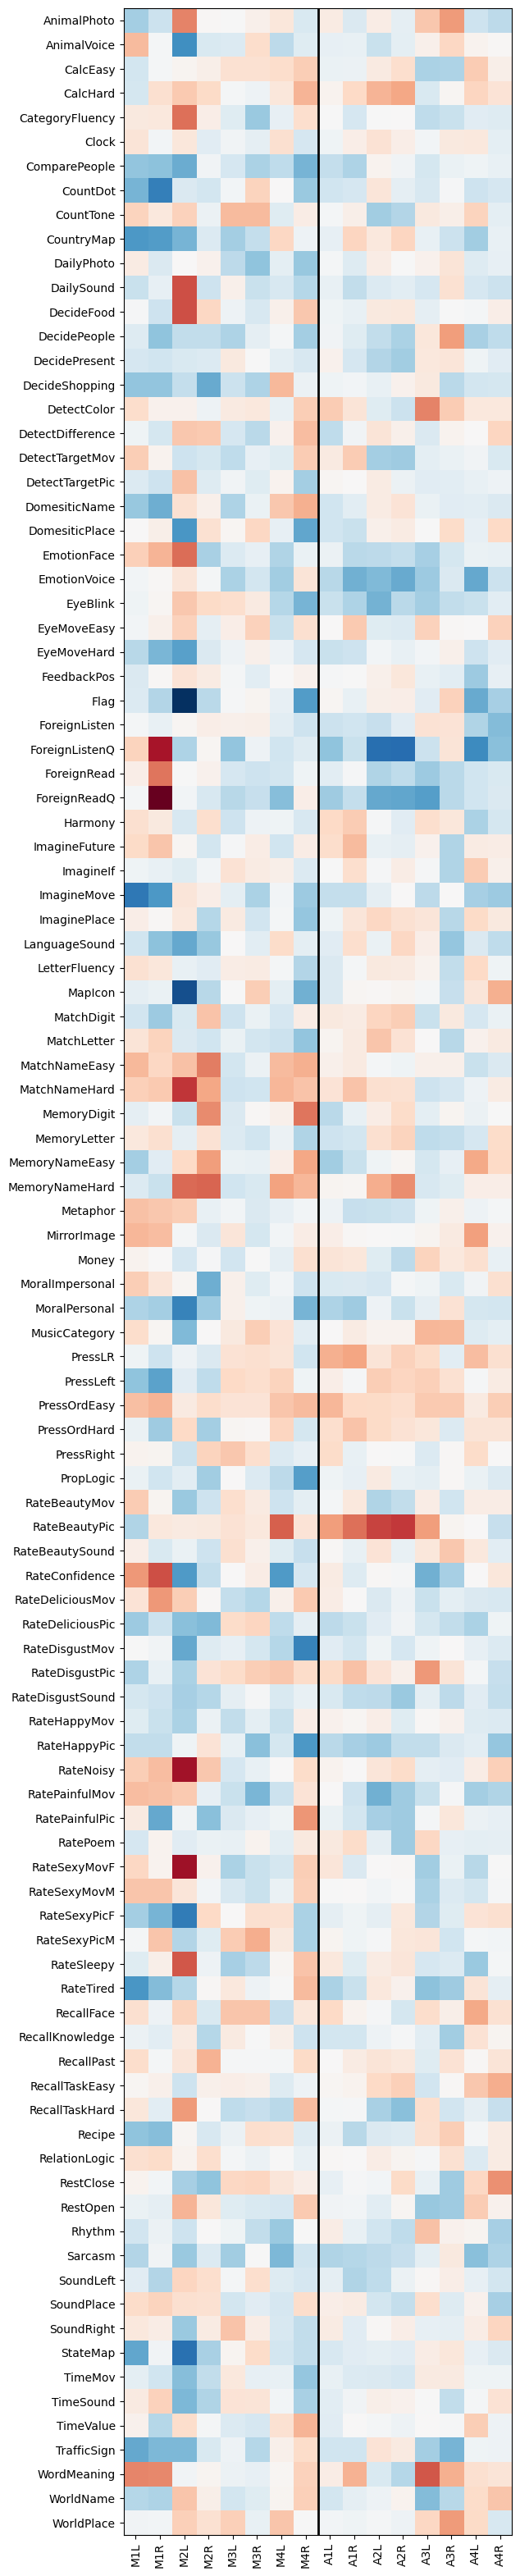

In [96]:
IBC_avg = IBC.groupby('condition').mean()
# IBC_avg[regions] = normalize(IBC_avg[regions])

Nishimoto_avg = Nishimoto.groupby('condition').mean()
# Nishimoto_avg[regions] = normalize(Nishimoto_avg[regions])
# --- IBC & Nishimoto ----
plt.figure(figsize=(30, 40))
plt.imshow(IBC_avg[select_regions], cmap=cmap)
plt.xticks(np.arange(len(select_regions)), select_regions, rotation=90)
plt.yticks(np.arange(len(IBC_avg.index.tolist())),
           IBC_avg.index.tolist())
# Plot vertcal line at half of matrix
plt.vlines(len(select_regions) / 2 - 0.5, -0.5,
                len(IBC_avg.index.tolist()) - 0.5, color='black', linewidth=2)

select_regions = motor_regions + action_regions
plt.figure(figsize=(30, 40))
plt.imshow(Nishimoto_avg[select_regions], cmap=cmap)
plt.xticks(np.arange(len(select_regions)), select_regions, rotation=90)
plt.yticks(np.arange(len(Nishimoto_avg.index.tolist())),
           Nishimoto_avg.index.tolist())
# Plot vertcal line at half of matrix
plt.vlines(len(select_regions) / 2 - 0.5, -0.5,
              len(Nishimoto_avg.index.tolist()) - 0.5, color='black', linewidth=2)

## A1 vermal & lateral component

/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_495/1095984554.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  IBC_avg_v = IBC_v.groupby('condition').mean()
/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_495/1095984554.py:38: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Nishimoto_avg_v = Nishimoto_v.groupby('condition').mean()


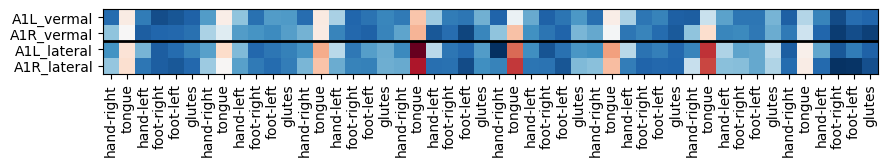

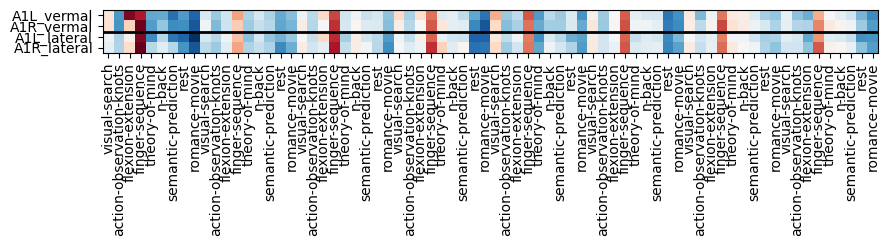

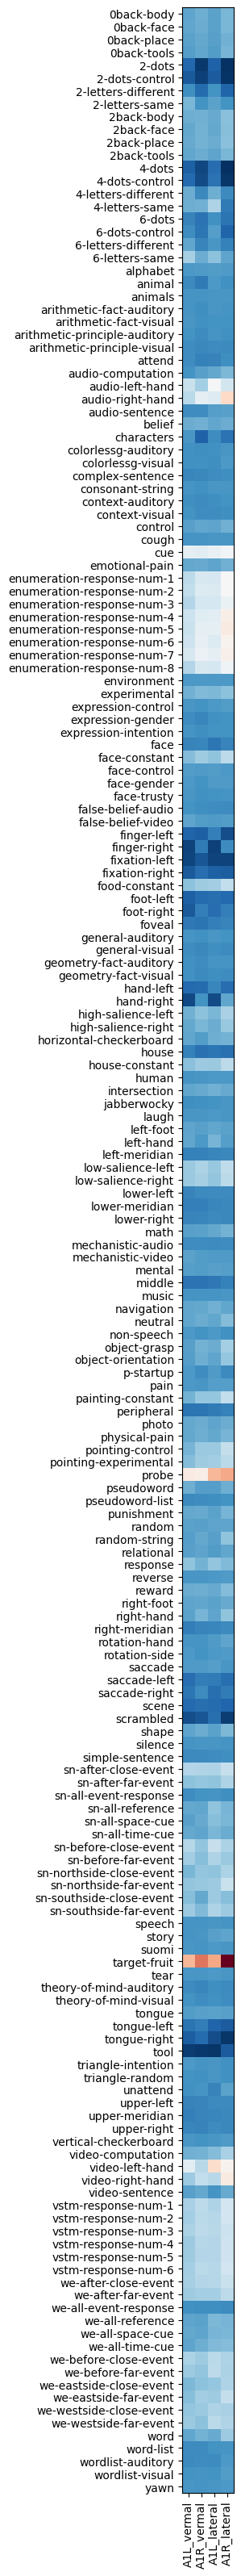

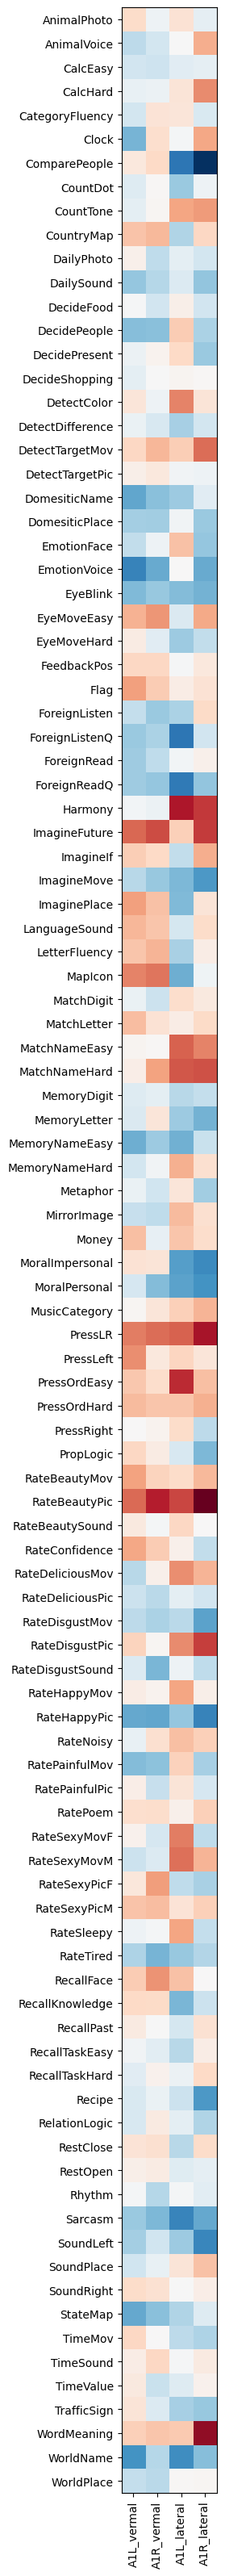

In [100]:
Data_verm = pd.read_csv(ut.export_dir + '/Profiles/' +
                       'NettekovenSym32_profile_individ_vermal_lateral.tsv', delimiter='\t')

regions_v = ['A1L_vermal', 'A1R_vermal', 'A1L_lateral', 'A1R_lateral']

Somatotopic_v = Data_verm[Data_verm.dataset == 'Somatotopic']
# Somatotopic_v[regions_v] = normalize(Somatotopic_v[regions_v])

Pontine_v = Data_verm[Data_verm.dataset == 'Pontine']
# Pontine_v[regions_v] = normalize(Pontine_v[regions_v])

IBC_v = Data_verm[Data_verm.dataset == 'IBC']
# IBC_v[regions_v] = normalize(IBC_v[regions_v])

Nishimoto_v = Data_verm[Data_verm.dataset == 'Nishimoto']
# Nishimoto_v[regions_v] = normalize(Nishimoto_v[regions_v])

plt.figure(figsize=(10, 10))
plt.imshow(Somatotopic_v[regions_v].T, cmap=cmap)
plt.yticks(np.arange(len(regions_v)), regions_v)
plt.xticks(np.arange(len(Somatotopic_v.condition.tolist())),
           Somatotopic_v.condition.tolist(), rotation=90)
plt.hlines(len(regions_v) / 2 - 0.5, -0.5,
           len(Somatotopic_v.index.tolist()) - 0.5, color='black', linewidth=2)
plt.savefig(ut.figure_dir + 'Somatotopic_vermal_lateral.png', dpi=300)

plt.figure(figsize=(10, 10))
plt.imshow(Pontine_v[regions_v].T, cmap=cmap)
plt.yticks(np.arange(len(regions_v)), regions_v)
plt.xticks(np.arange(len(Pontine_v.condition.tolist())),
           Pontine_v.condition.tolist(), rotation=90)
plt.hlines(len(regions_v) / 2 - 0.5, -0.5,
           len(Pontine_v.index.tolist()) - 0.5, color='black', linewidth=2)
plt.savefig(ut.figure_dir + 'Pontine_vermal_lateral.png', dpi=300)

# Plot IBC & Nishimoto
IBC_avg_v = IBC_v.groupby('condition').mean()
Nishimoto_avg_v = Nishimoto_v.groupby('condition').mean()

plt.figure(figsize=(30, 40))
plt.imshow(IBC_avg_v[regions_v], cmap=cmap)
plt.xticks(np.arange(len(regions_v)), regions_v, rotation=90)
plt.yticks(np.arange(len(IBC_avg_v.index.tolist())),
           IBC_avg_v.index.tolist())
plt.savefig(ut.figure_dir + 'IBC_vermal_lateral.png', dpi=300)
# plt.hlines(len(select_regions) / 2 - 0.5, -0.5,
#            len(IBC.index.tolist()) - 0.5, color='black', linewidth=2)

plt.figure(figsize=(30, 40))
plt.imshow(Nishimoto_avg_v[regions_v], cmap=cmap)
plt.xticks(np.arange(len(regions_v)), regions_v, rotation=90)
plt.yticks(np.arange(len(Nishimoto_avg_v.index.tolist())),
           Nishimoto_avg_v.index.tolist())
plt.savefig(ut.figure_dir + 'Nishimoto_vermal_lateral.png', dpi=300)
# plt.hlines(len(select_regions) / 2 - 0.5, -0.5,
#            len(Nishimoto.index.tolist()) - 0.5, color='black', linewidth=2)


In [98]:
# pass
# ut.export_dir = '/Volumes/diedrichsen_data$/data/Cerebellum/ProbabilisticParcellationModel/Atlases/'

# file = 'NettekovenSym32_profile_individ'
# D = pd.read_csv(ut.export_dir + 'Profiles/' +
#                 file + '.tsv', delimiter='\t')


# data_v = pd.read_csv(ut.export_dir + 'Profiles/' +
#                 'NettekovenSym32_profile_individ_vermal_lateral.tsv', delimiter='\t')

# # Concatenate horizontally
# # Drop A1L and A1R column from D
# D = D.drop(['A1L', 'A1R'], axis=1)
# data_v = data_v.drop(['dataset', 'session', 'condition', 'participant_id', 'participant_num'], axis=1)
# data_new = pd.concat([D, data_v], axis=1)

# data_new.to_csv(ut.export_dir + 'Profiles/' +
#                 'NettekovenSym32_profile_individ_A1split.tsv', sep="\t", index=False)


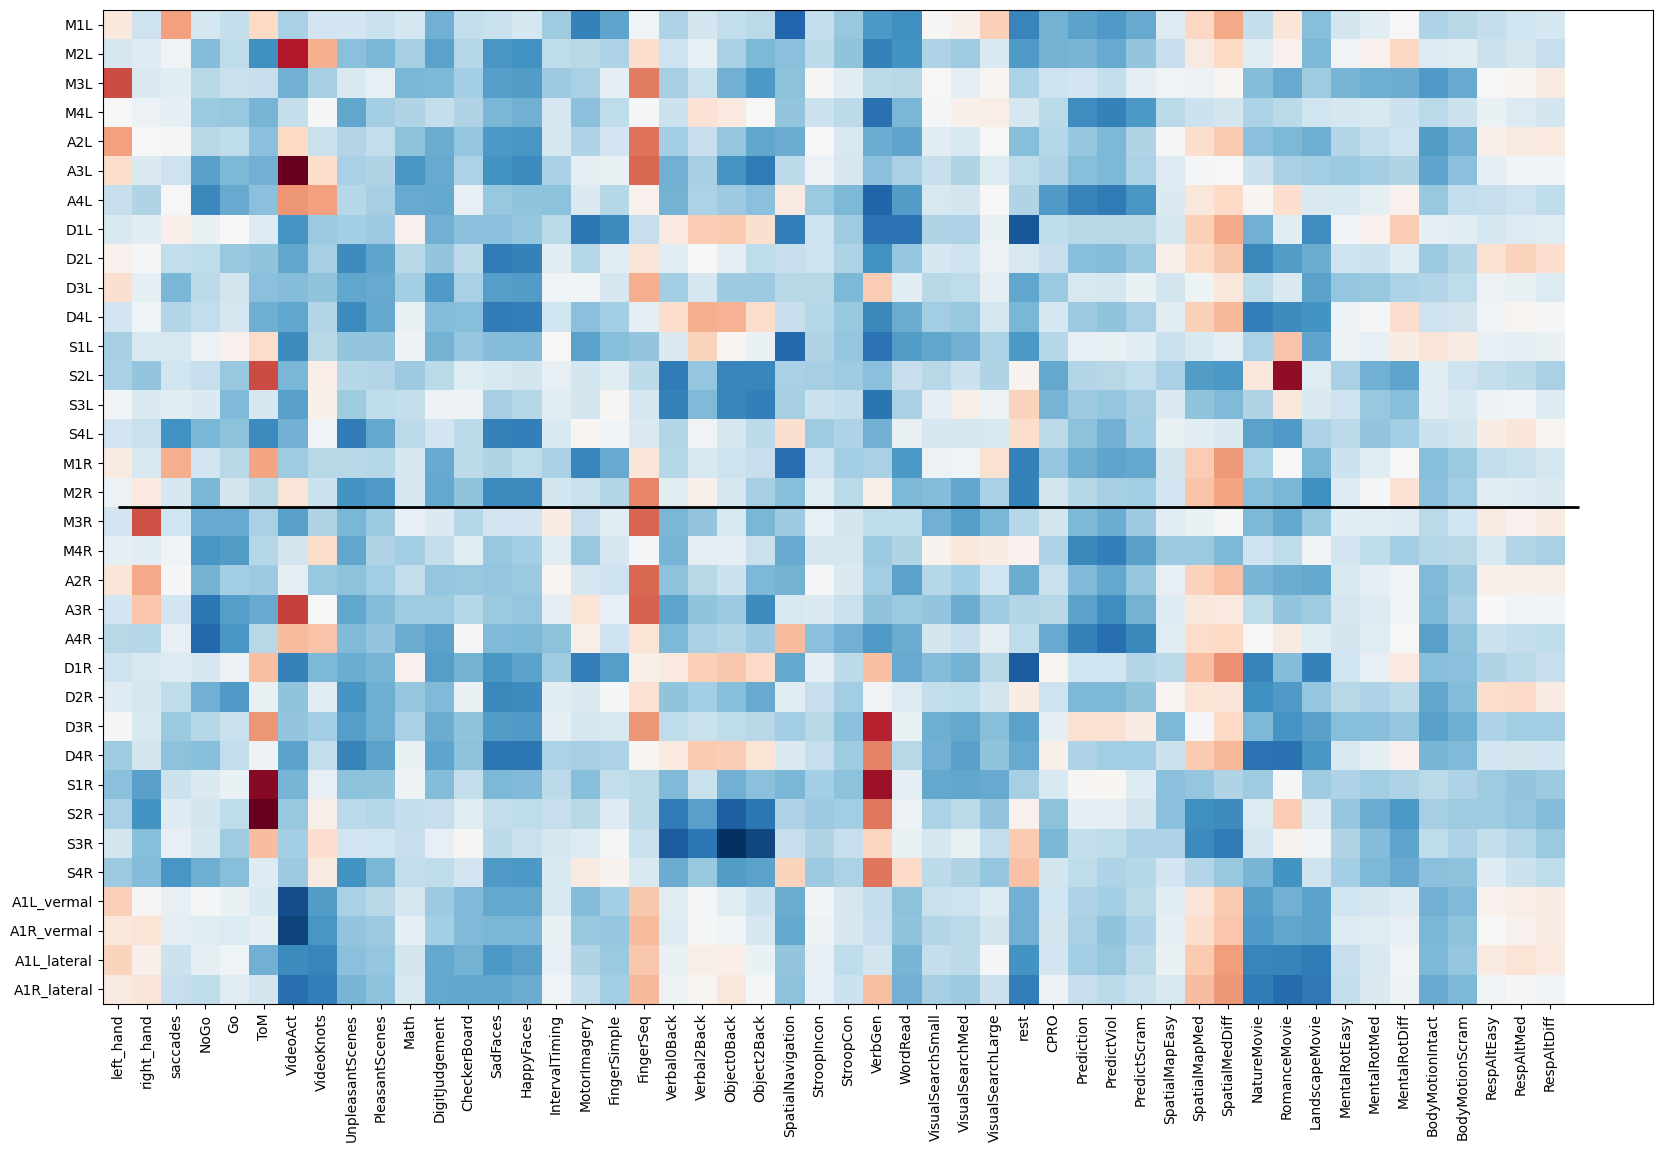

In [99]:
regions_split = deepcopy(regions)
regions_split.remove('A1L')
regions_split.remove('A1R')
regions_split = regions_split + regions_v
Data_v, regions_split = fm.load_profiles(
    file=f"NettekovenSym32_profile_individ_A1split", regions=regions_split)
tags = fm.load_features()
tags_individ = fm.subject_features(tags, Data_v)
task_matrix, task_codes = fm.task_indicator(Data_v)
tags_task = np.concatenate(
    (tags_individ.T.to_numpy(), task_matrix), axis=1)

Data_norm, tags_norm = fm.normalize(Data_v[regions_split], tags_task)

# Ridge regression
R2, features = ridgeFit(Data_norm.to_numpy(), tags_norm,
                        fit_intercept=False, voxel_wise=False, alpha=1.0)


# Make dataframe
Features = pd.DataFrame(features.T, columns=[
    'left_hand', 'right_hand', 'saccades'] + list(task_codes.keys()), index=regions_split)

# Plot
cmap = plt.get_cmap('RdBu_r')
plt.figure(figsize=(20, 20))
plt.imshow(Features, cmap=cmap)
plt.yticks(np.arange(len(regions_split)), regions_split)
plt.xticks(np.arange(len(Features.columns.tolist())),
           Features.columns.tolist(), rotation=90)

# Plot a horizontal line in the middle
plt.hlines(len(regions_split) / 2 - 0.5, 0,
           len(Features.columns.tolist()), color='black', linewidth=2)
plt.savefig(ut.figure_dir + 'Features_vermal_lateral.png', dpi=300)


/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:128: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region1 = region1.groupby(['task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:129: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region2 = region2.groupby(['task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:128: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, nume

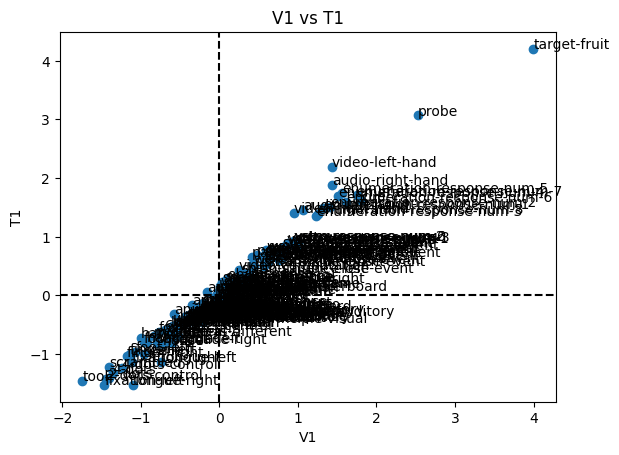

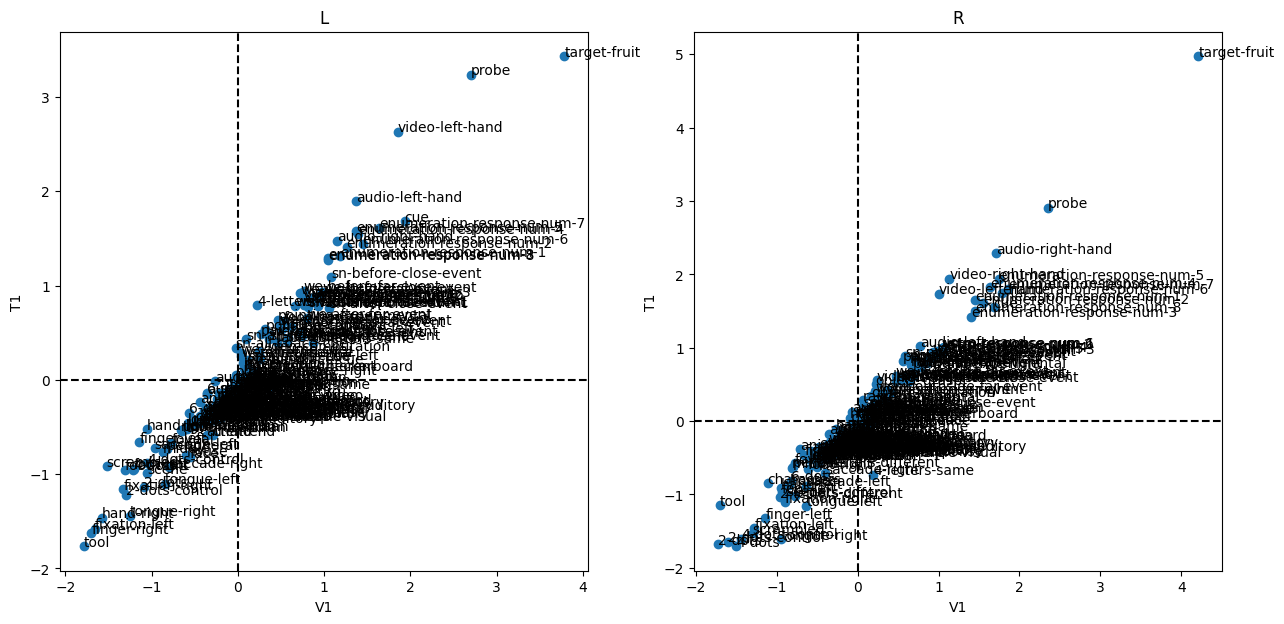

In [82]:
IBC_v_melted = IBC_avg_v[regions_v].reset_index().melt(id_vars=['condition'], var_name='region', value_name='score')
# Rename A1L_vermal to V1L, etc.
IBC_v_melted['region'] = IBC_v_melted['region'].str.replace('A1L_vermal', 'V1L')
IBC_v_melted['region'] = IBC_v_melted['region'].str.replace('A1R_vermal', 'V1R')
IBC_v_melted['region'] = IBC_v_melted['region'].str.replace('A1L_lateral', 'T1L')
IBC_v_melted['region'] = IBC_v_melted['region'].str.replace('A1R_lateral', 'T1R')
# Rename condition column to task
IBC_v_melted = IBC_v_melted.rename(columns={'condition': 'task'})

# Rename

# # Split region into side and region
IBC_v_melted['side'] = IBC_v_melted.region.str[-1]
IBC_v_melted['reg'] = IBC_v_melted.region.str[0:2]


compare = ['V1', 'T1']
fm.scatter_plot(compare, IBC_v_melted)
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
fm.scatter_plot(compare, IBC_v_melted, side='L')
plt.subplot(1, 2, 2)
fm.scatter_plot(compare, IBC_v_melted, side='R')


/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:128: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region1 = region1.groupby(['task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:129: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region2 = region2.groupby(['task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:128: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, nume

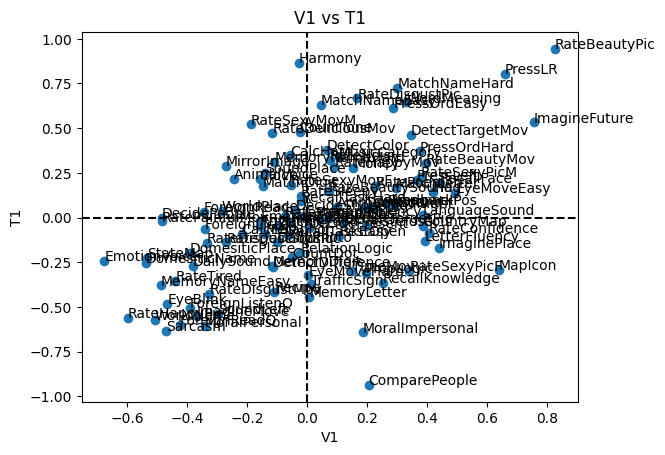

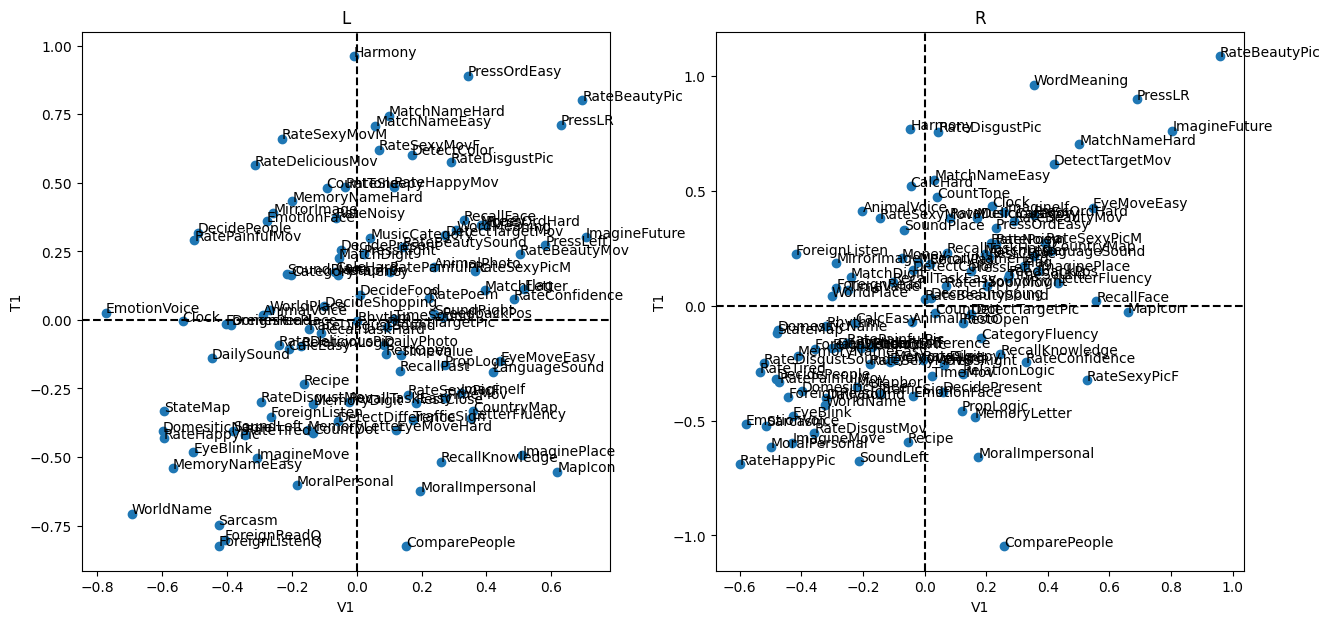

In [83]:
Nishimoto_v_melted = Nishimoto_avg_v[regions_v].reset_index().melt(
    id_vars=['condition'], var_name='region', value_name='score')
# Rename A1L_vermal to V1L, etc.
Nishimoto_v_melted['region'] = Nishimoto_v_melted['region'].str.replace(
    'A1L_vermal', 'V1L')
Nishimoto_v_melted['region'] = Nishimoto_v_melted['region'].str.replace(
    'A1R_vermal', 'V1R')
Nishimoto_v_melted['region'] = Nishimoto_v_melted['region'].str.replace(
    'A1L_lateral', 'T1L')
Nishimoto_v_melted['region'] = Nishimoto_v_melted['region'].str.replace(
    'A1R_lateral', 'T1R')
# Rename condition column to task
Nishimoto_v_melted = Nishimoto_v_melted.rename(columns={'condition': 'task'})

# Rename

# # Split region into side and region
Nishimoto_v_melted['side'] = Nishimoto_v_melted.region.str[-1]
Nishimoto_v_melted['reg'] = Nishimoto_v_melted.region.str[0:2]


compare = ['V1', 'T1']
fm.scatter_plot(compare, Nishimoto_v_melted)
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
fm.scatter_plot(compare, Nishimoto_v_melted, side='L')
plt.subplot(1, 2, 2)
fm.scatter_plot(compare, Nishimoto_v_melted, side='R')


/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:128: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region1 = region1.groupby(['task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:129: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region2 = region2.groupby(['task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:128: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, nume

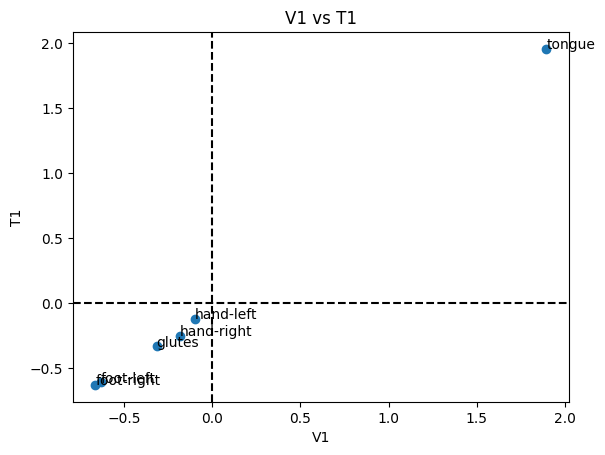

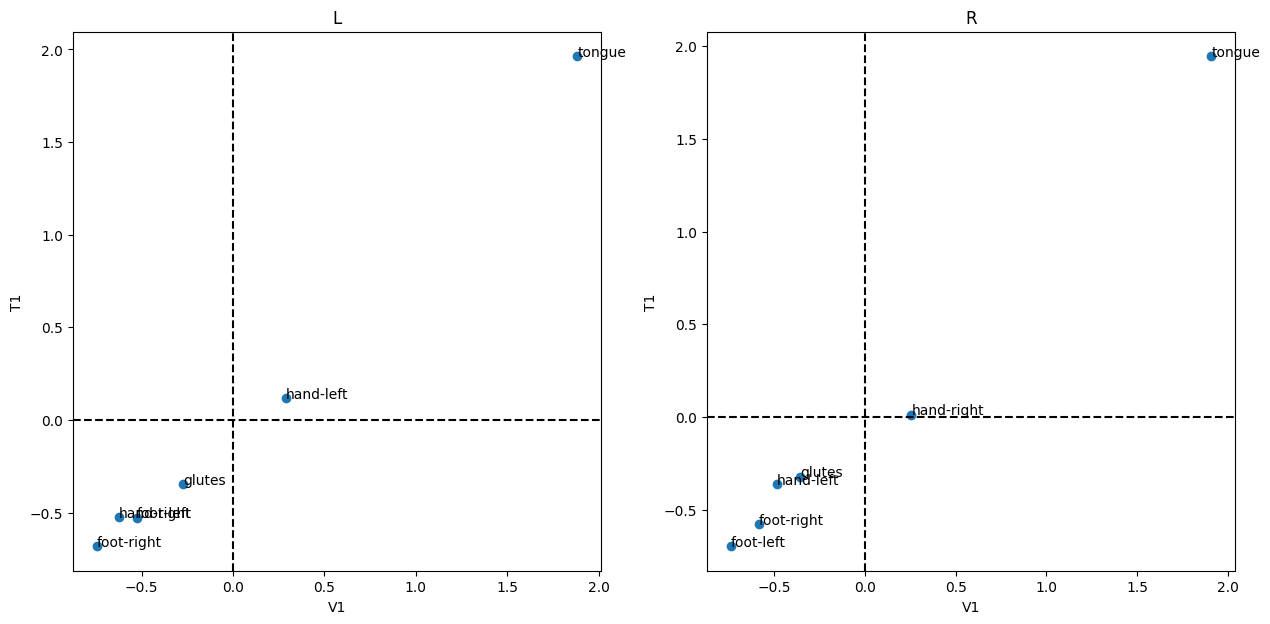

In [87]:
Somatotopic_v_melted = Somatotopic_v[['condition'] + regions_v].reset_index().melt(
    id_vars=['condition'], var_name='region', value_name='score')
# Rename A1L_vermal to V1L, etc.
Somatotopic_v_melted['region'] = Somatotopic_v_melted['region'].str.replace(
    'A1L_vermal', 'V1L')
Somatotopic_v_melted['region'] = Somatotopic_v_melted['region'].str.replace(
    'A1R_vermal', 'V1R')
Somatotopic_v_melted['region'] = Somatotopic_v_melted['region'].str.replace(
    'A1L_lateral', 'T1L')
Somatotopic_v_melted['region'] = Somatotopic_v_melted['region'].str.replace(
    'A1R_lateral', 'T1R')
# Rename condition column to task
Somatotopic_v_melted = Somatotopic_v_melted.rename(
    columns={'condition': 'task'})

# Rename

# # Split region into side and region
Somatotopic_v_melted['side'] = Somatotopic_v_melted.region.str[-1]
Somatotopic_v_melted['reg'] = Somatotopic_v_melted.region.str[0:2]


compare = ['V1', 'T1']
fm.scatter_plot(compare, Somatotopic_v_melted)
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
fm.scatter_plot(compare, Somatotopic_v_melted, side='L')
plt.subplot(1, 2, 2)
fm.scatter_plot(compare, Somatotopic_v_melted, side='R')


In [ ]:
# Melt
T = Feature_regions.reset_index().melt(id_vars='index', value_vars=Features.columns.tolist(),
                         var_name='task', value_name='score')

# make index into column
T['region'] = T['index']
# # Split region into side and region
T['side'] = T.region.str[-1]
T['reg'] = T.region.str[0:2]


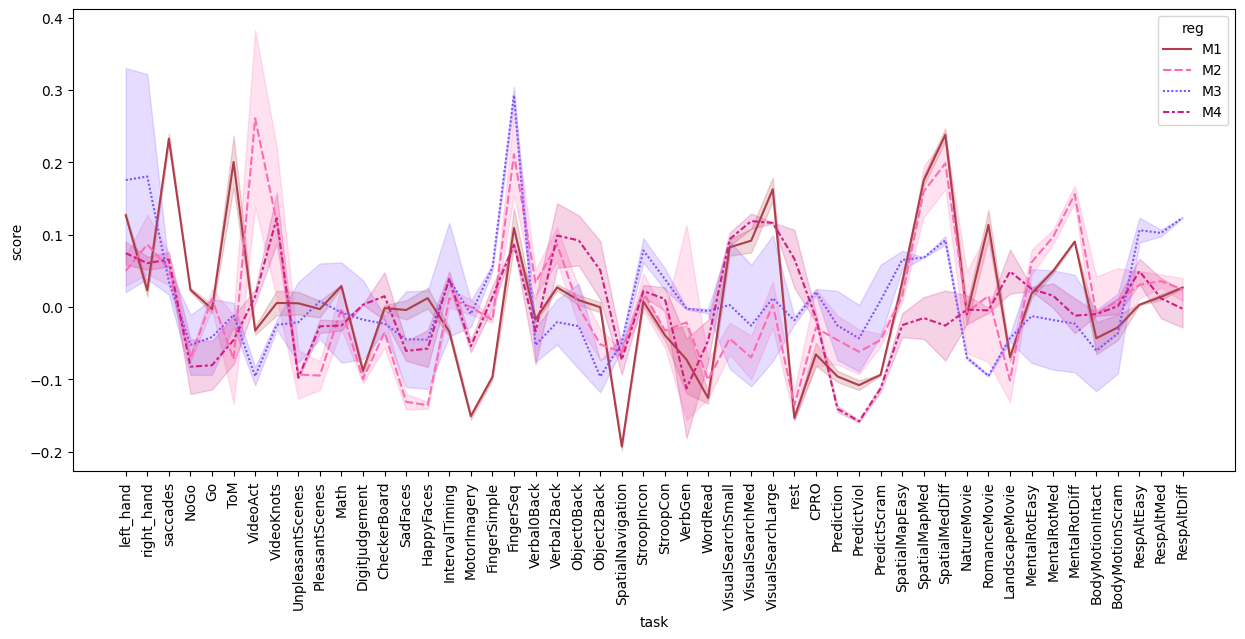

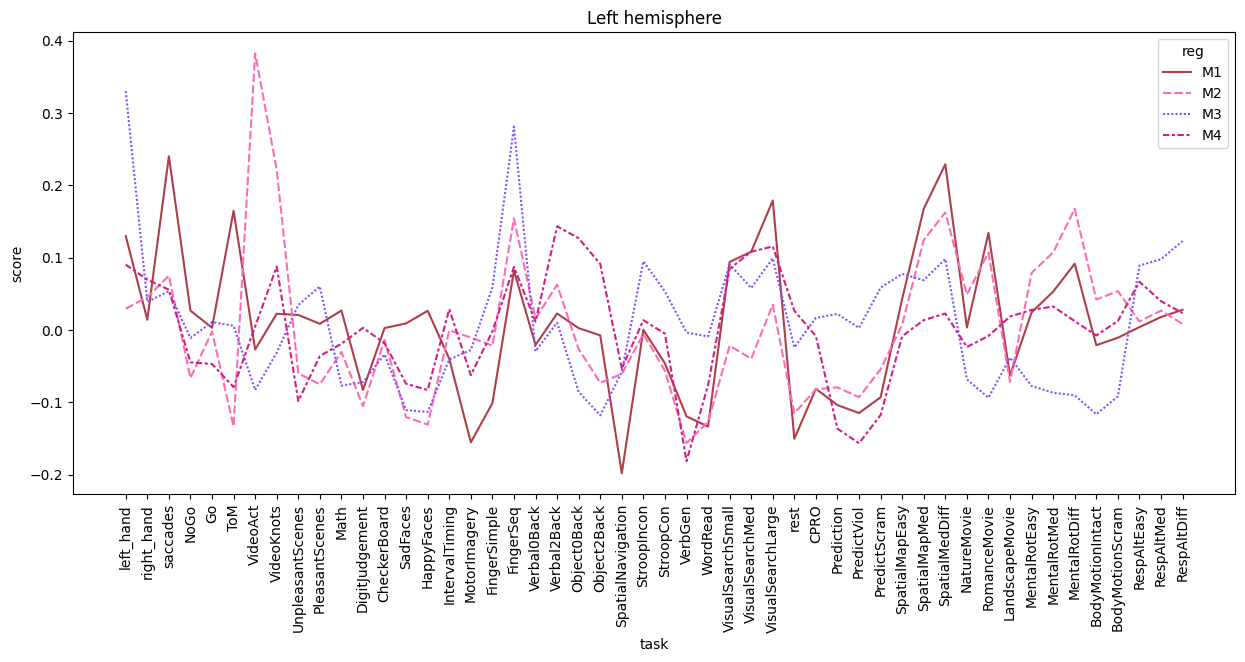

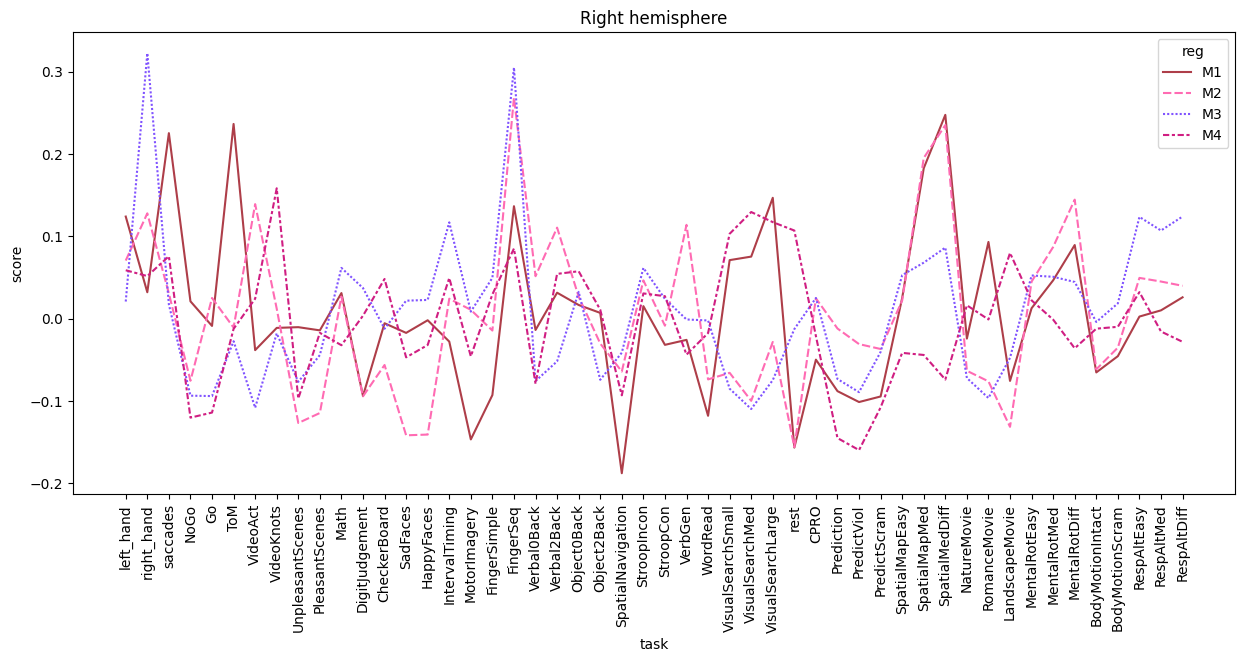

In [ ]:
plt.figure(figsize=(15, 6))
sb.lineplot(data=T, x='task', y='score', hue='reg',
            palette=reg_colors, hue_order=['M1', 'M2', 'M3', 'M4'], style='reg')
xt = plt.xticks(rotation=90)

plt.figure(figsize=(15, 6))
sb.lineplot(data=T[T.side=='L'], x='task', y='score', hue='reg',
            palette=reg_colors, hue_order=['M1', 'M2', 'M3', 'M4'], style='reg')
plt.title('Left hemisphere')
xt = plt.xticks(rotation=90)

plt.figure(figsize=(15, 6))
sb.lineplot(data=T[T.side == 'R'], x='task', y='score', hue='reg',
            palette=reg_colors, hue_order=['M1', 'M2', 'M3', 'M4'], style='reg')
plt.title('Right hemisphere')
xt = plt.xticks(rotation=90)


/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:127: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region1 = region1.groupby(['task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:128: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region2 = region2.groupby(['task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:127: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, nume

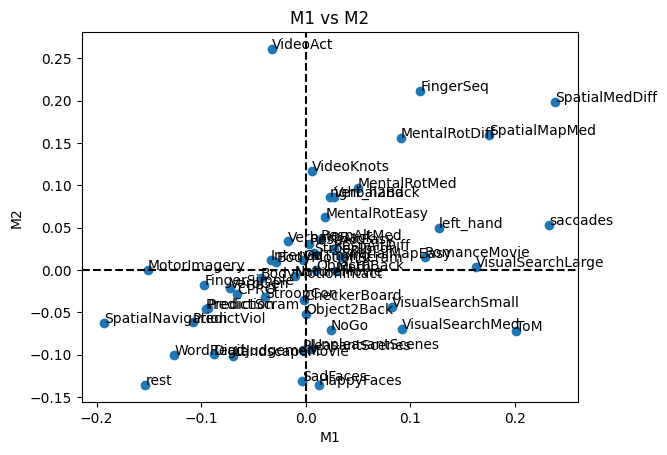

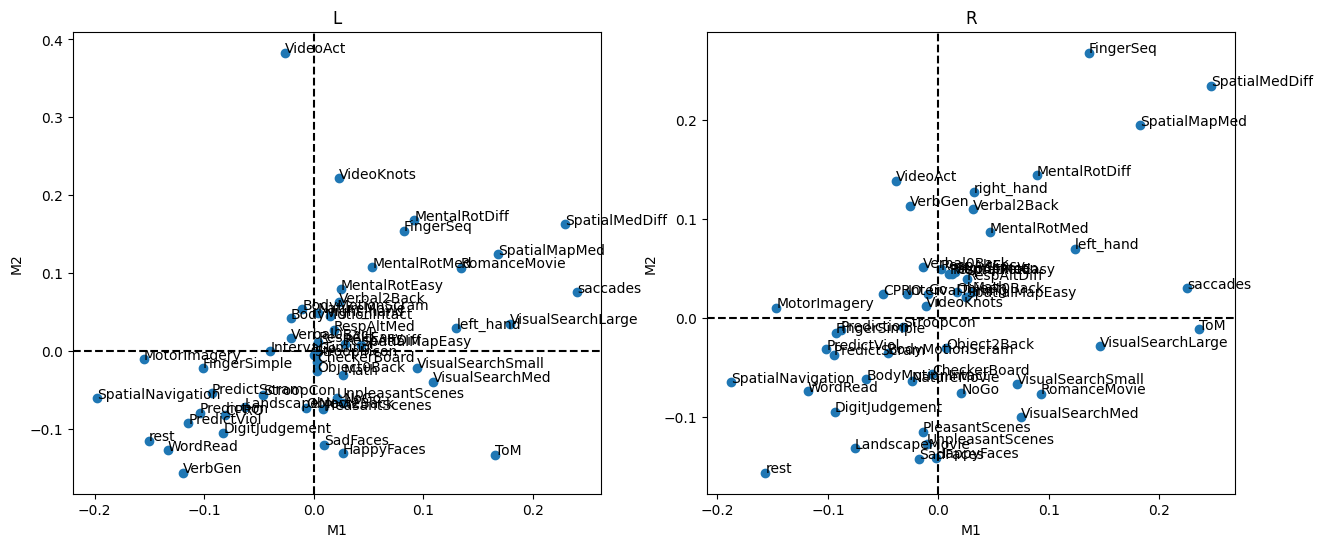

In [ ]:
compare = ['M1', 'M2']
fm.scatter_plot(compare, T)
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
fm.scatter_plot(compare, T, side='L')
plt.subplot(1, 2, 2)
fm.scatter_plot(compare, T, side='R')

/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:127: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region1 = region1.groupby(['task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:128: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region2 = region2.groupby(['task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:127: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, nume

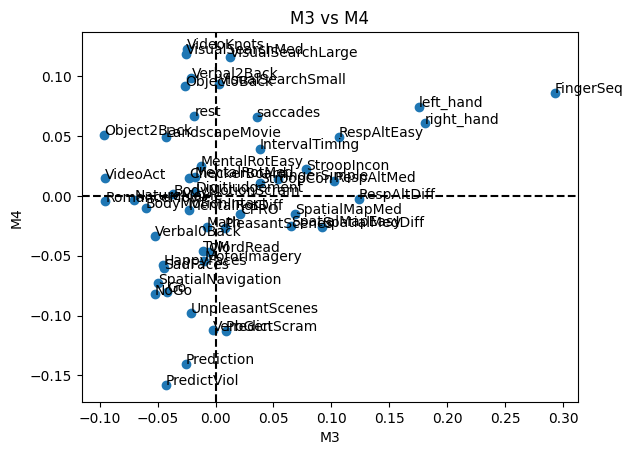

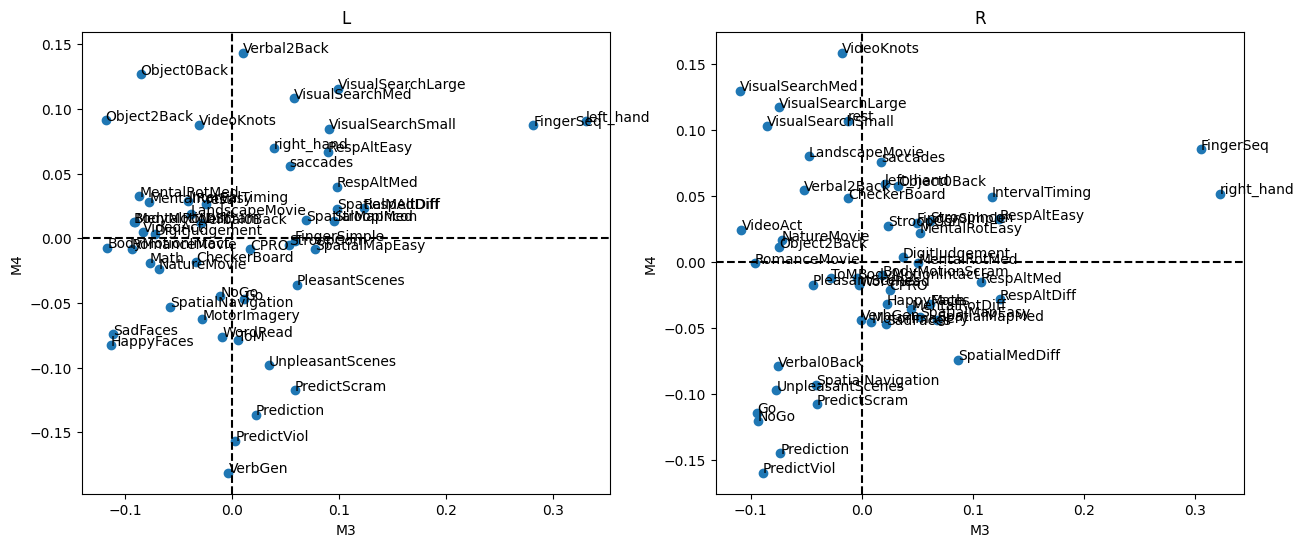

In [ ]:
compare = ['M3', 'M4']
fm.scatter_plot(compare, T)
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
fm.scatter_plot(compare, T, side='L')
plt.subplot(1, 2, 2)
fm.scatter_plot(compare, T, side='R')


/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:127: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region1 = region1.groupby(['task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:128: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region2 = region2.groupby(['task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:127: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, nume

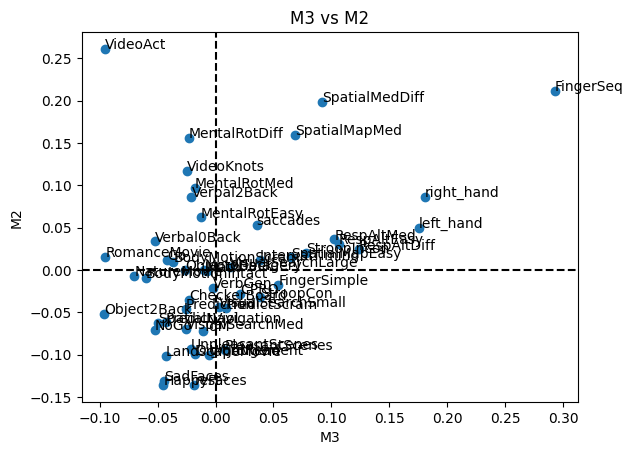

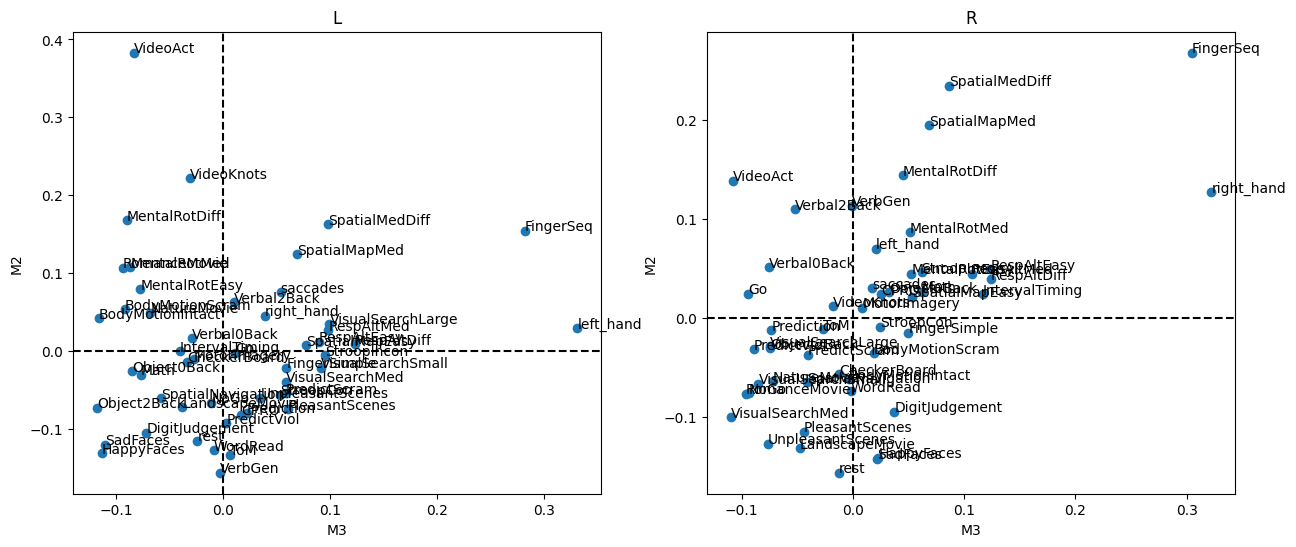

In [ ]:
compare = ['M3', 'M2']
fm.scatter_plot(compare, T)
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
fm.scatter_plot(compare, T, side='L')
plt.subplot(1, 2, 2)
fm.scatter_plot(compare, T, side='R')


/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:127: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region1 = region1.groupby(['task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:128: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region2 = region2.groupby(['task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:127: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, nume

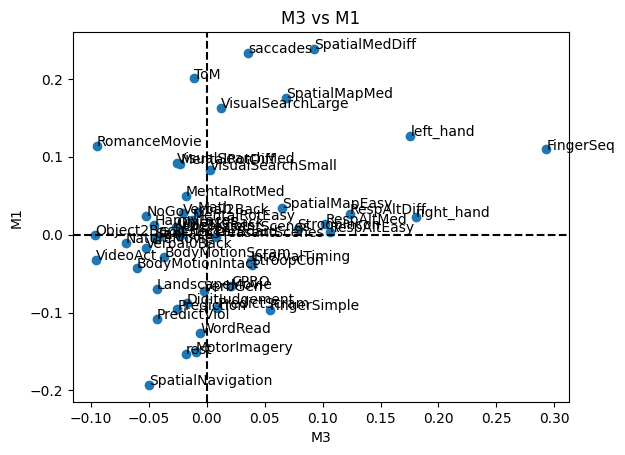

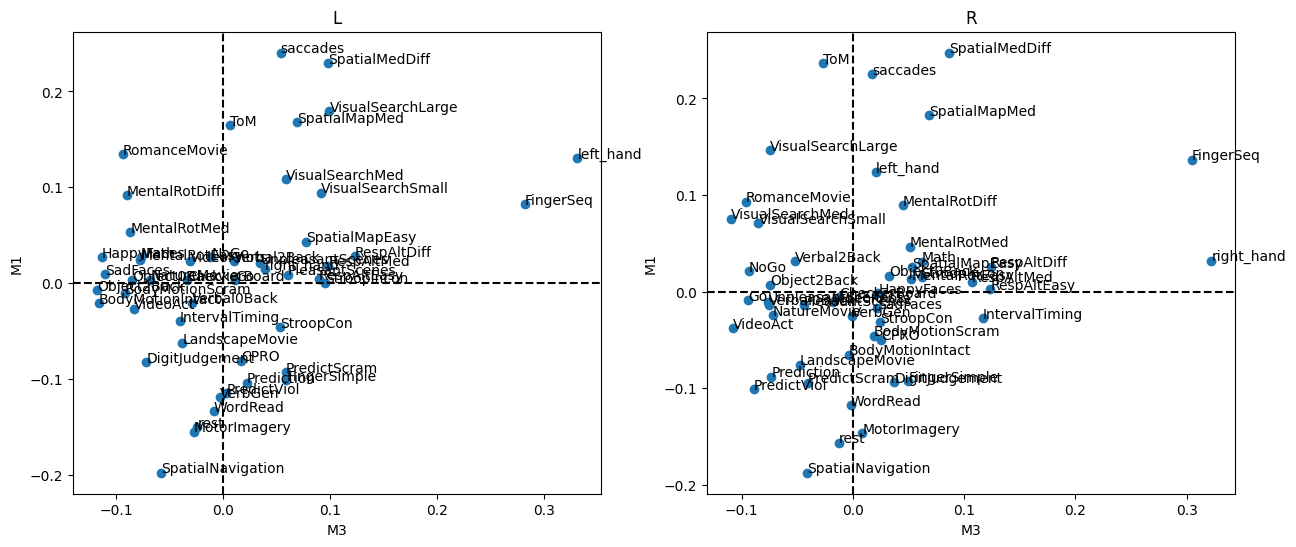

In [ ]:
compare = ['M3', 'M1']
fm.scatter_plot(compare, T)
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
fm.scatter_plot(compare, T, side='L')
plt.subplot(1, 2, 2)
fm.scatter_plot(compare, T, side='R')


# Compare left and right hemisphere

/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:151: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  region1 = data[data['reg'] == compare][data['side'] == 'L']
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:152: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  region2 = data[data['reg'] == compare][data['side'] == 'R']
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:154: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region1 = region1.groupby(['task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:155: FutureWarning: The default value of 

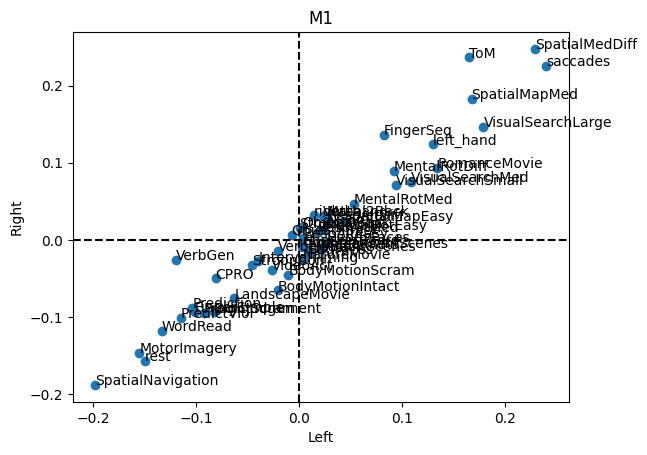

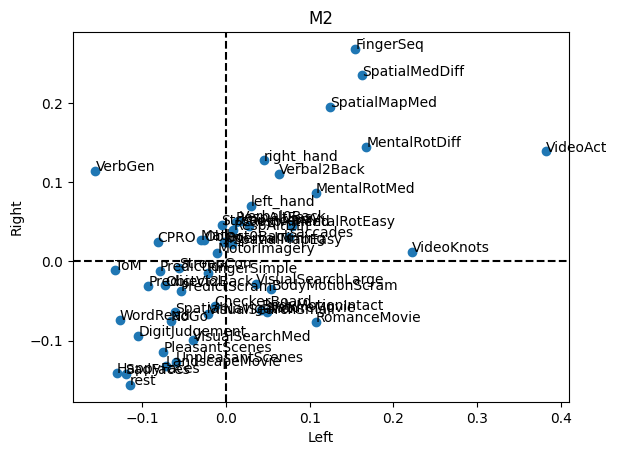

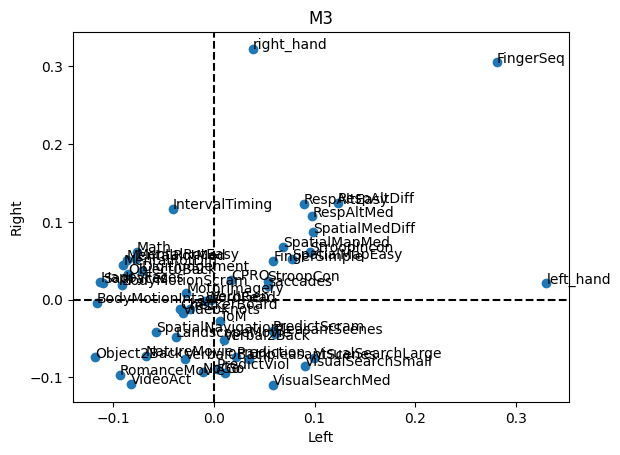

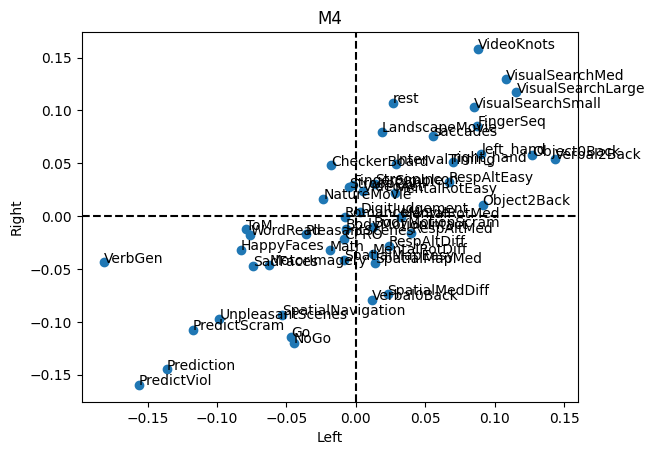

In [ ]:
fm.scatter_plot_hemispheres('M1', T)
plt.figure()
fm.scatter_plot_hemispheres('M2', T)
plt.figure()
fm.scatter_plot_hemispheres('M3', T)
plt.figure()
fm.scatter_plot_hemispheres('M4', T)


# Plot differentiating tasks

([<matplotlib.axis.XTick at 0x7f8849196160>,
 [Text(0, 0, 'left_hand'),
  Text(1, 0, 'right_hand'),
  Text(2, 0, 'saccades'),
  Text(3, 0, 'NoGo'),
  Text(4, 0, 'Go'),
  Text(5, 0, 'ToM'),
  Text(6, 0, 'VideoAct'),
  Text(7, 0, 'VideoKnots'),
  Text(8, 0, 'UnpleasantScenes'),
  Text(9, 0, 'PleasantScenes'),
  Text(10, 0, 'Math'),
  Text(11, 0, 'DigitJudgement'),
  Text(12, 0, 'CheckerBoard'),
  Text(13, 0, 'SadFaces'),
  Text(14, 0, 'HappyFaces'),
  Text(15, 0, 'IntervalTiming'),
  Text(16, 0, 'MotorImagery'),
  Text(17, 0, 'FingerSimple'),
  Text(18, 0, 'FingerSeq'),
  Text(19, 0, 'Verbal0Back'),
  Text(20, 0, 'Verbal2Back'),
  Text(21, 0, 'Object0Back'),
  Text(22, 0, 'Object2Back'),
  Text(23, 0, 'SpatialNavigation'),
  Text(24, 0, 'StroopIncon'),
  Text(25, 0, 'StroopCon'),
  Text(26, 0, 'VerbGen'),
  Text(27, 0, 'WordRead'),
  Text(28, 0, 'VisualSearchSmall'),
  Text(29, 0, 'VisualSearchMed'),
  Text(30, 0, 'VisualSearchLarge'),
  Text(31, 0, 'rest'),
  Text(32, 0, 'CPRO'),
  Text

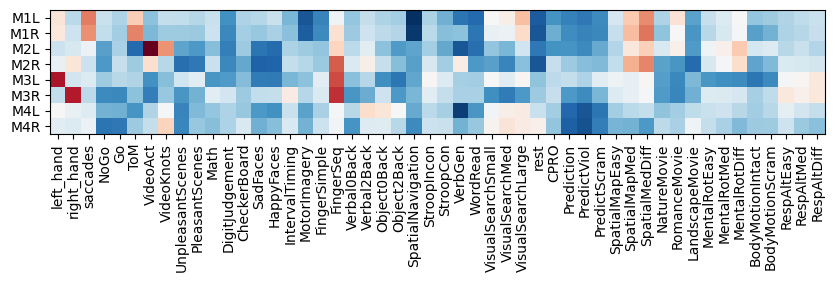

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(Features.loc[regions], cmap=cmap)
plt.yticks(np.arange(len(regions)), regions)
plt.xticks(np.arange(len(Features.columns.tolist())),
           Features.columns.tolist(), rotation=90)


/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:179: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby(['reg', 'task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:185: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task1 = task1.groupby(['index']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:186: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeri

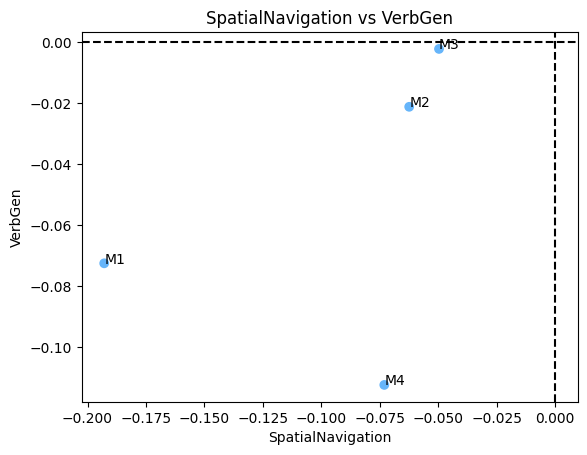

In [ ]:
compare = ['SpatialNavigation', 'VerbGen']
fm.scatter_plot_tasks(compare, T, ignore_side=True, color='domains')


/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:179: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby(['reg', 'task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:185: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task1 = task1.groupby(['index']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:186: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeri

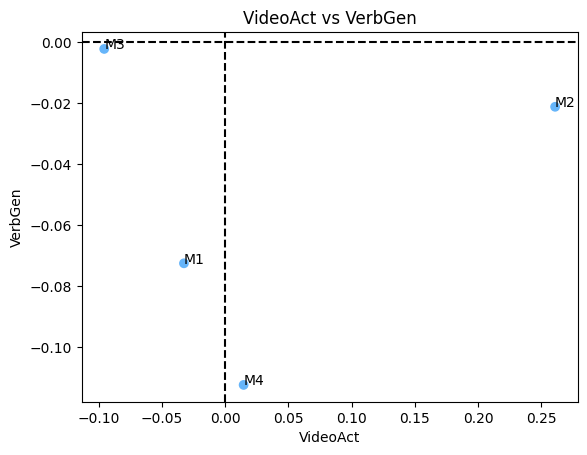

In [ ]:
compare = ['VideoAct', 'VerbGen']
fm.scatter_plot_tasks(compare, T, ignore_side=True, color='domains')


/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:179: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby(['reg', 'task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:185: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task1 = task1.groupby(['index']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:186: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeri

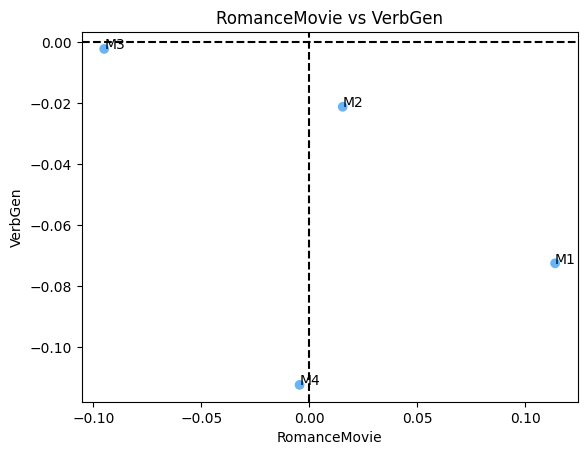

In [ ]:
compare = ['RomanceMovie', 'VerbGen']
fm.scatter_plot_tasks(compare, T, ignore_side=True, color='domains')


/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:179: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby(['reg', 'task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:185: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task1 = task1.groupby(['index']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:186: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeri

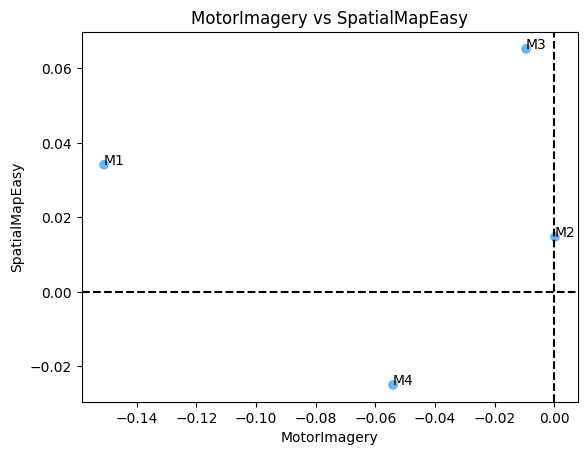

In [ ]:
compare = ['MotorImagery', 'SpatialMapEasy']
fm.scatter_plot_tasks(compare, T, ignore_side=True, color='domains')


/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:185: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task1 = task1.groupby(['index']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:186: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task2 = task2.groupby(['index']).mean().reset_index()


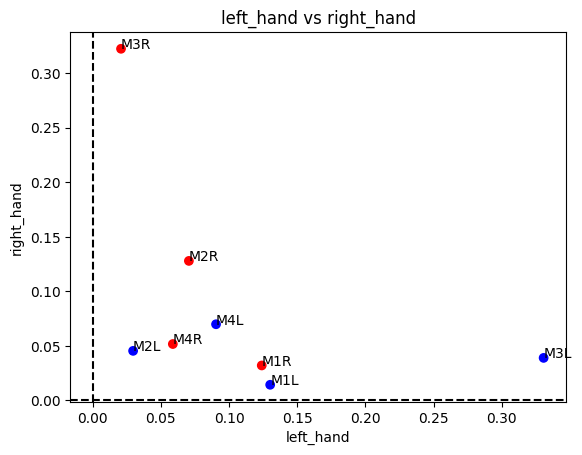

In [ ]:
compare = ['left_hand', 'right_hand']
fm.scatter_plot_tasks(compare, T, ignore_side=False, color='hemispheres')
plt.savefig(
    ut.figure_dir + f'localizers_motor_{compare[0]}_{compare[1]}_left-right_hand.png', dpi=300)


/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:185: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task1 = task1.groupby(['index']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:186: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task2 = task2.groupby(['index']).mean().reset_index()


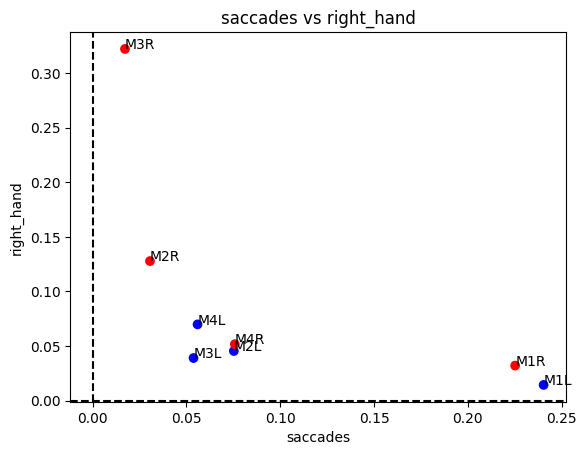

In [ ]:
compare = ['saccades', 'right_hand']
fm.scatter_plot_tasks(compare, T, ignore_side=False, color='hemispheres')
